In [1]:
from __future__ import division
from sklearn.cluster import KMeans
from numbers import Number
from pandas import DataFrame
import sys, codecs, numpy
import numpy as np

In [2]:
class autovivify_list(dict):
        '''Pickleable class to replicate the functionality of collections.defaultdict'''
        def __missing__(self, key):
                value = self[key] = []
                return value

        def __add__(self, x):
                '''Override addition for numeric types when self is empty'''
                if not self and isinstance(x, Number):
                        return x
                raise ValueError

        def __sub__(self, x):
                '''Also provide subtraction method'''
                if not self and isinstance(x, Number):
                        return -1 * x
                raise ValueError

In [3]:
def find_word_clusters(labels_array, cluster_labels):
        '''Read in the labels array and clusters label and return the set of words in each cluster'''
        cluster_to_words = autovivify_list()
        for c, i in enumerate(cluster_labels):
            cluster_to_words[ i ].append( labels_array[c] )
        return cluster_to_words

In [4]:
import argparse
import logging
import time
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [5]:
start = time.time()
print("Load word2vec model ... ", end="", flush=True)
model_path='data/GoogleNews-vectors-negative300.bin'
w2v_model = KeyedVectors.load_word2vec_format(model_path, binary=bool(1))
print("finished in {:.2f} sec.".format(time.time() - start), flush=True)
word_vectors = w2v_model.wv.syn0
n_words = word_vectors.shape[0]
vec_size = word_vectors.shape[1]
print("#words = {0}, vector size = {1}".format(n_words, vec_size))

Load word2vec model ... finished in 58.63 sec.
#words = 3000000, vector size = 300


In [6]:
with open('data/all_predicate.txt', 'r') as myfile:
    array=[]
    for line in myfile:
        *others, last = line.split('/')
        last=last.rstrip('\n') 
        array.append(last)

In [7]:
with open('data/all_predicate_entity.txt', mode='wt', encoding='utf-8') as myfile:
    myfile.write('\n'.join(array))

In [8]:
us2gb = {'accessorize': 'accessorise',
 'accessorized': 'accessorised',
 'accessorizes': 'accessorises',
 'accessorizing': 'accessorising',
 'acclimatization': 'acclimatisation',
 'acclimatize': 'acclimatise',
 'acclimatized': 'acclimatised',
 'acclimatizes': 'acclimatises',
 'acclimatizing': 'acclimatising',
 'accouterments': 'accoutrements',
 'aerogram': 'aerogramme',
 'aerograms': 'aerogrammes',
 'aggrandizement': 'aggrandisement',
 'aging': 'ageing',
 'agonize': 'agonise',
 'agonized': 'agonised',
 'agonizes': 'agonises',
 'agonizing': 'agonising',
 'agonizingly': 'agonisingly',
 'airplane': 'aeroplane',
 'airplanes ': 'aeroplanes ',
 'almanac': 'almanack',
 'almanacs': 'almanacks',
 'aluminum': 'aluminium',
 'amortizable': 'amortisable',
 'amortization': 'amortisation',
 'amortizations': 'amortisations',
 'amortize': 'amortise',
 'amortized': 'amortised',
 'amortizes': 'amortises',
 'amortizing': 'amortising',
 'amphitheater': 'amphitheatre',
 'amphitheaters': 'amphitheatres',
 'analog': 'analogue',
 'analogs': 'analogues',
 'analyze': 'analyse',
 'analyzed': 'analysed',
 'analyzes': 'analyses',
 'analyzing': 'analysing',
 'anemia': 'anaemia',
 'anemic': 'anaemic',
 'anesthesia': 'anaesthesia',
 'anesthetic': 'anaesthetic',
 'anesthetics': 'anaesthetics',
 'anesthetist': 'anaesthetist',
 'anesthetists': 'anaesthetists',
 'anesthetize': 'anaesthetize',
 'anesthetized': 'anaesthetized',
 'anesthetizes': 'anaesthetizes',
 'anesthetizing': 'anaesthetizing',
 'anglicize': 'anglicise',
 'anglicized': 'anglicised',
 'anglicizes': 'anglicises',
 'anglicizing': 'anglicising',
 'annualized': 'annualised',
 'antagonize': 'antagonise',
 'antagonized': 'antagonised',
 'antagonizes': 'antagonises',
 'antagonizing': 'antagonising',
 'apologize': 'apologise',
 'apologized': 'apologised',
 'apologizes': 'apologises',
 'apologizing': 'apologising',
 'appall': 'appal',
 'appalls': 'appals',
 'appetizer': 'appetiser',
 'appetizers': 'appetisers',
 'appetizing': 'appetising',
 'appetizingly': 'appetisingly',
 'arbor': 'arbour',
 'arbors': 'arbours',
 'archeological': 'archaeological',
 'archeologically': 'archaeologically',
 'archeologist': 'archaeologist',
 'archeologists': 'archaeologists',
 'archeology': 'archaeology',
 'ardor': 'ardour',
 'armor': 'armour',
 'armored': 'armoured',
 'armorer': 'armourer',
 'armorers': 'armourers',
 'armories': 'armouries',
 'armory': 'armoury',
 'artifact': 'artefact',
 'artifacts': 'artefacts',
 'authorize': 'authorise',
 'authorized': 'authorised',
 'authorizes': 'authorises',
 'authorizing': 'authorising',
 'ax': 'axe',
 'backpedaled': 'backpedalled',
 'backpedaling': 'backpedalling',
 'balk': 'baulk',
 'balked': 'baulked',
 'balking': 'baulking',
 'balks': 'baulks',
 'banister': 'bannister',
 'banisters': 'bannisters',
 'baptize': 'baptise',
 'baptized': 'baptised',
 'baptizes': 'baptises',
 'baptizing': 'baptising',
 'bastardize': 'bastardise',
 'bastardized': 'bastardised',
 'bastardizes': 'bastardises',
 'bastardizing': 'bastardising',
 'battleax': 'battleaxe',
 'bedeviled': 'bedevilled',
 'bedeviling': 'bedevilling',
 'behavior': 'behaviour',
 'behavioral': 'behavioural',
 'behaviorism': 'behaviourism',
 'behaviorist': 'behaviourist',
 'behaviorists': 'behaviourists',
 'behaviors': 'behaviours',
 'behoove': 'behove',
 'behooved': 'behoved',
 'behooves': 'behoves',
 'bejeweled': 'bejewelled',
 'belabor': 'belabour',
 'belabored': 'belaboured',
 'belaboring': 'belabouring',
 'belabors': 'belabours',
 'beveled': 'bevelled',
 'bevies': 'bevvies',
 'bevy': 'bevvy',
 'biased': 'biassed',
 'biasing': 'biassing',
 'binging': 'bingeing',
 'bougainvillea': 'bougainvillaea',
 'bougainvilleas': 'bougainvillaeas',
 'bowdlerize': 'bowdlerise',
 'bowdlerized': 'bowdlerised',
 'bowdlerizes': 'bowdlerises',
 'bowdlerizing': 'bowdlerising',
 'breathalyze': 'breathalyse',
 'breathalyzed': 'breathalysed',
 'breathalyzer': 'breathalyser',
 'breathalyzers': 'breathalysers',
 'breathalyzes': 'breathalyses',
 'breathalyzing': 'breathalysing',
 'brutalize': 'brutalise',
 'brutalized': 'brutalised',
 'brutalizes': 'brutalises',
 'brutalizing': 'brutalising',
 'busses': 'buses',
 'bussing': 'busing',
 'caliber': 'calibre',
 'calibers': 'calibres',
 'caliper': 'calliper',
 'calipers': 'callipers',
 'calisthenics': 'callisthenics',
 'canalize': 'canalise',
 'canalized': 'canalised',
 'canalizes': 'canalises',
 'canalizing': 'canalising',
 'cancelation': 'cancellation',
 'cancelations': 'cancellations',
 'canceled': 'cancelled',
 'canceling': 'cancelling',
 'candor': 'candour',
 'cannibalize': 'cannibalise',
 'cannibalized': 'cannibalised',
 'cannibalizes': 'cannibalises',
 'cannibalizing': 'cannibalising',
 'canonize': 'canonise',
 'canonized': 'canonised',
 'canonizes': 'canonises',
 'canonizing': 'canonising',
 'capitalize': 'capitalise',
 'capitalized': 'capitalised',
 'capitalizes': 'capitalises',
 'capitalizing': 'capitalising',
 'caramelize': 'caramelise',
 'caramelized': 'caramelised',
 'caramelizes': 'caramelises',
 'caramelizing': 'caramelising',
 'carbonize': 'carbonise',
 'carbonized': 'carbonised',
 'carbonizes': 'carbonises',
 'carbonizing': 'carbonising',
 'caroled': 'carolled',
 'caroling': 'carolling',
 'catalog': 'catalogue',
 'cataloged': 'catalogued',
 'cataloging': 'cataloguing',
 'catalogs': 'catalogues',
 'catalyze': 'catalyse',
 'catalyzed': 'catalysed',
 'catalyzes': 'catalyses',
 'catalyzing': 'catalysing',
 'categorize': 'categorise',
 'categorized': 'categorised',
 'categorizes': 'categorises',
 'categorizing': 'categorising',
 'cauterize': 'cauterise',
 'cauterized': 'cauterised',
 'cauterizes': 'cauterises',
 'cauterizing': 'cauterising',
 'caviled': 'cavilled',
 'caviling': 'cavilling',
 'center': 'centre',
 'centered': 'centred',
 'centerfold': 'centrefold',
 'centerfolds': 'centrefolds',
 'centerpiece': 'centrepiece',
 'centerpieces': 'centrepieces',
 'centers': 'centres',
 'centigram': 'centigramme',
 'centigrams': 'centigrammes',
 'centiliter': 'centilitre',
 'centiliters': 'centilitres',
 'centimeter': 'centimetre',
 'centimeters': 'centimetres',
 'centralize': 'centralise',
 'centralized': 'centralised',
 'centralizes': 'centralises',
 'centralizing': 'centralising',
 'cesarean': 'caesarean',
 'cesareans': 'caesareans',
 'channeled': 'channelled',
 'channeling': 'channelling',
 'characterize': 'characterise',
 'characterized': 'characterised',
 'characterizes': 'characterises',
 'characterizing': 'characterising',
 'check': 'cheque',
 'checkbook': 'chequebook',
 'checkbooks': 'chequebooks',
 'checkered': 'chequered',
 'checks': 'cheques',
 'chili': 'chilli',
 'chimera': 'chimaera',
 'chimeras': 'chimaeras',
 'chiseled': 'chiselled',
 'chiseling': 'chiselling',
 'cipher': 'cypher',
 'ciphers': 'cyphers',
 'circularize': 'circularise',
 'circularized': 'circularised',
 'circularizes': 'circularises',
 'circularizing': 'circularising',
 'civilize': 'civilise',
 'civilized': 'civilised',
 'civilizes': 'civilises',
 'civilizing': 'civilising',
 'clamor': 'clamour',
 'clamored': 'clamoured',
 'clamoring': 'clamouring',
 'clamors': 'clamours',
 'clangor': 'clangour',
 'clarinetist': 'clarinettist',
 'clarinetists': 'clarinettists',
 'collectivize': 'collectivise',
 'collectivized': 'collectivised',
 'collectivizes': 'collectivises',
 'collectivizing': 'collectivising',
 'colonization': 'colonisation',
 'colonize': 'colonise',
 'colonized': 'colonised',
 'colonizer': 'coloniser',
 'colonizers': 'colonisers',
 'colonizes': 'colonises',
 'colonizing': 'colonising',
 'color': 'colour',
 'colorant': 'colourant',
 'colorants': 'colourants',
 'colored': 'coloured',
 'coloreds': 'coloureds',
 'colorful': 'colourful',
 'colorfully': 'colourfully',
 'coloring': 'colouring',
 'colorize': 'colourize',
 'colorized': 'colourized',
 'colorizes': 'colourizes',
 'colorizing': 'colourizing',
 'colorless': 'colourless',
 'colors': 'colours',
 'commercialize': 'commercialise',
 'commercialized': 'commercialised',
 'commercializes': 'commercialises',
 'commercializing': 'commercialising',
 'compartmentalize': 'compartmentalise',
 'compartmentalized': 'compartmentalised',
 'compartmentalizes': 'compartmentalises',
 'compartmentalizing': 'compartmentalising',
 'computerize': 'computerise',
 'computerized': 'computerised',
 'computerizes': 'computerises',
 'computerizing': 'computerising',
 'conceptualize': 'conceptualise',
 'conceptualized': 'conceptualised',
 'conceptualizes': 'conceptualises',
 'conceptualizing': 'conceptualising',
 'connection': 'connexion',
 'connections': 'connexions',
 'contextualize': 'contextualise',
 'contextualized': 'contextualised',
 'contextualizes': 'contextualises',
 'contextualizing': 'contextualising',
 'councilor': 'councillor',
 'councilors': 'councillors',
 'counseled': 'counselled',
 'counseling': 'counselling',
 'counselor': 'counsellor',
 'counselors': 'counsellors',
 'cozier': 'cosier',
 'cozies': 'cosies',
 'coziest': 'cosiest',
 'cozily': 'cosily',
 'coziness': 'cosiness',
 'cozy': 'cosy',
 'crenelated': 'crenellated',
 'criminalize': 'criminalise',
 'criminalized': 'criminalised',
 'criminalizes': 'criminalises',
 'criminalizing': 'criminalising',
 'criticize': 'criticise',
 'criticized': 'criticised',
 'criticizes': 'criticises',
 'criticizing': 'criticising',
 'crueler': 'crueller',
 'cruelest': 'cruellest',
 'crystallization': 'crystallisation',
 'crystallize': 'crystallise',
 'crystallized': 'crystallised',
 'crystallizes': 'crystallises',
 'crystallizing': 'crystallising',
 'cudgeled': 'cudgelled',
 'cudgeling': 'cudgelling',
 'customize': 'customise',
 'customized': 'customised',
 'customizes': 'customises',
 'customizing': 'customising',
 'decentralization': 'decentralisation',
 'decentralize': 'decentralise',
 'decentralized': 'decentralised',
 'decentralizes': 'decentralises',
 'decentralizing': 'decentralising',
 'decriminalization': 'decriminalisation',
 'decriminalize': 'decriminalise',
 'decriminalized': 'decriminalised',
 'decriminalizes': 'decriminalises',
 'decriminalizing': 'decriminalising',
 'defense': 'defence',
 'defenseless': 'defenceless',
 'defenses': 'defences',
 'dehumanization': 'dehumanisation',
 'dehumanize': 'dehumanise',
 'dehumanized': 'dehumanised',
 'dehumanizes': 'dehumanises',
 'dehumanizing': 'dehumanising',
 'demeanor': 'demeanour',
 'demilitarization': 'demilitarisation',
 'demilitarize': 'demilitarise',
 'demilitarized': 'demilitarised',
 'demilitarizes': 'demilitarises',
 'demilitarizing': 'demilitarising',
 'demobilization': 'demobilisation',
 'demobilize': 'demobilise',
 'demobilized': 'demobilised',
 'demobilizes': 'demobilises',
 'demobilizing': 'demobilising',
 'democratization': 'democratisation',
 'democratize': 'democratise',
 'democratized': 'democratised',
 'democratizes': 'democratises',
 'democratizing': 'democratising',
 'demonize': 'demonise',
 'demonized': 'demonised',
 'demonizes': 'demonises',
 'demonizing': 'demonising',
 'demoralization': 'demoralisation',
 'demoralize': 'demoralise',
 'demoralized': 'demoralised',
 'demoralizes': 'demoralises',
 'demoralizing': 'demoralising',
 'denationalization': 'denationalisation',
 'denationalize': 'denationalise',
 'denationalized': 'denationalised',
 'denationalizes': 'denationalises',
 'denationalizing': 'denationalising',
 'deodorize': 'deodorise',
 'deodorized': 'deodorised',
 'deodorizes': 'deodorises',
 'deodorizing': 'deodorising',
 'depersonalize': 'depersonalise',
 'depersonalized': 'depersonalised',
 'depersonalizes': 'depersonalises',
 'depersonalizing': 'depersonalising',
 'deputize': 'deputise',
 'deputized': 'deputised',
 'deputizes': 'deputises',
 'deputizing': 'deputising',
 'desensitization': 'desensitisation',
 'desensitize': 'desensitise',
 'desensitized': 'desensitised',
 'desensitizes': 'desensitises',
 'desensitizing': 'desensitising',
 'destabilization': 'destabilisation',
 'destabilize': 'destabilise',
 'destabilized': 'destabilised',
 'destabilizes': 'destabilises',
 'destabilizing': 'destabilising',
 'dialed': 'dialled',
 'dialing': 'dialling',
 'dialog': 'dialogue',
 'dialogs': 'dialogues',
 'diarrhea': 'diarrhoea',
 'digitize': 'digitise',
 'digitized': 'digitised',
 'digitizes': 'digitises',
 'digitizing': 'digitising',
 'discolor': 'discolour',
 'discolored': 'discoloured',
 'discoloring': 'discolouring',
 'discolors': 'discolours',
 'disemboweled': 'disembowelled',
 'disemboweling': 'disembowelling',
 'disfavor': 'disfavour',
 'disheveled': 'dishevelled',
 'passivizes': 'passivises',
 'passivizing': 'passivising',
 'pasteurization': 'pasteurisation',
 'pasteurize': 'pasteurise',
 'pasteurized': 'pasteurised',
 'pasteurizes': 'pasteurises',
 'pasteurizing': 'pasteurising',
 'patronize': 'patronise',
 'patronized': 'patronised',
 'patronizes': 'patronises',
 'patronizing': 'patronising',
 'patronizingly': 'patronisingly',
 'pedaled': 'pedalled',
 'pedaling': 'pedalling',
 'pederast': 'paederast',
 'pederasts': 'paederasts',
 'pedestrianization': 'pedestrianisation',
 'pedestrianize': 'pedestrianise',
 'pedestrianized': 'pedestrianised',
 'pedestrianizes': 'pedestrianises',
 'pedestrianizing': 'pedestrianising',
 'pediatric': 'paediatric',
 'pediatrician': 'paediatrician',
 'pediatricians': 'paediatricians',
 'pediatrics': 'paediatrics',
 'pedophile': 'paedophile',
 'pedophiles': 'paedophiles',
 'pedophilia': 'paedophilia',
 'penalize': 'penalise',
 'penalized': 'penalised',
 'penalizes': 'penalises',
 'penalizing': 'penalising',
 'penciled': 'pencilled',
 'penciling': 'pencilling',
 'personalize': 'personalise',
 'personalized': 'personalised',
 'personalizes': 'personalises',
 'personalizing': 'personalising',
 'pharmacopeia': 'pharmacopoeia',
 'pharmacopeias': 'pharmacopoeias',
 'philosophize': 'philosophise',
 'philosophized': 'philosophised',
 'philosophizes': 'philosophises',
 'philosophizing': 'philosophising',
 'phony ': 'phoney ',
 'pizzazz': 'pzazz',
 'plagiarize': 'plagiarise',
 'plagiarized': 'plagiarised',
 'plagiarizes': 'plagiarises',
 'plagiarizing': 'plagiarising',
 'plow': 'plough',
 'plowed': 'ploughed',
 'plowing': 'ploughing',
 'plowman': 'ploughman',
 'plowmen': 'ploughmen',
 'plows': 'ploughs',
 'plowshare': 'ploughshare',
 'plowshares': 'ploughshares',
 'polarization': 'polarisation',
 'polarize': 'polarise',
 'polarized': 'polarised',
 'polarizes': 'polarises',
 'polarizing': 'polarising',
 'politicization': 'politicisation',
 'politicize': 'politicise',
 'politicized': 'politicised',
 'politicizes': 'politicises',
 'politicizing': 'politicising',
 'popularization': 'popularisation',
 'popularize': 'popularise',
 'popularized': 'popularised',
 'popularizes': 'popularises',
 'popularizing': 'popularising',
 'pouf': 'pouffe',
 'poufs': 'pouffes',
 'practice': 'practise',
 'practiced': 'practised',
 'practices': 'practises',
 'practicing ': 'practising ',
 'presidium': 'praesidium',
 'presidiums ': 'praesidiums ',
 'pressurization': 'pressurisation',
 'pressurize': 'pressurise',
 'pressurized': 'pressurised',
 'pressurizes': 'pressurises',
 'pressurizing': 'pressurising',
 'pretense': 'pretence',
 'pretenses': 'pretences',
 'primeval': 'primaeval',
 'prioritization': 'prioritisation',
 'prioritize': 'prioritise',
 'prioritized': 'prioritised',
 'prioritizes': 'prioritises',
 'prioritizing': 'prioritising',
 'privatization': 'privatisation',
 'privatizations': 'privatisations',
 'privatize': 'privatise',
 'privatized': 'privatised',
 'privatizes': 'privatises',
 'privatizing': 'privatising',
 'professionalization': 'professionalisation',
 'professionalize': 'professionalise',
 'professionalized': 'professionalised',
 'professionalizes': 'professionalises',
 'professionalizing': 'professionalising',
 'program': 'programme',
 'programs': 'programmes',
 'prolog': 'prologue',
 'prologs': 'prologues',
 'propagandize': 'propagandise',
 'propagandized': 'propagandised',
 'propagandizes': 'propagandises',
 'propagandizing': 'propagandising',
 'proselytize': 'proselytise',
 'proselytized': 'proselytised',
 'proselytizer': 'proselytiser',
 'proselytizers': 'proselytisers',
 'proselytizes': 'proselytises',
 'proselytizing': 'proselytising',
 'psychoanalyze': 'psychoanalyse',
 'psychoanalyzed': 'psychoanalysed',
 'psychoanalyzes': 'psychoanalyses',
 'psychoanalyzing': 'psychoanalysing',
 'publicize': 'publicise',
 'publicized': 'publicised',
 'publicizes': 'publicises',
 'publicizing': 'publicising',
 'pulverization': 'pulverisation',
 'pulverize': 'pulverise',
 'pulverized': 'pulverised',
 'pulverizes': 'pulverises',
 'pulverizing': 'pulverising',
 'pummel': 'pummelled',
 'pummeled': 'pummelling',
 'quarreled': 'quarrelled',
 'quarreling': 'quarrelling',
 'radicalize': 'radicalise',
 'radicalized': 'radicalised',
 'radicalizes': 'radicalises',
 'radicalizing': 'radicalising',
 'rancor': 'rancour',
 'randomize': 'randomise',
 'randomized': 'randomised',
 'randomizes': 'randomises',
 'randomizing': 'randomising',
 'rationalization': 'rationalisation',
 'rationalizations': 'rationalisations',
 'rationalize': 'rationalise',
 'rationalized': 'rationalised',
 'rationalizes': 'rationalises',
 'rationalizing': 'rationalising',
 'raveled': 'ravelled',
 'raveling': 'ravelling',
 'realizable': 'realisable',
 'realization': 'realisation',
 'realizations': 'realisations',
 'realize': 'realise',
 'realized': 'realised',
 'realizes': 'realises',
 'realizing': 'realising',
 'recognizable': 'recognisable',
 'recognizably': 'recognisably',
 'recognizance': 'recognisance',
 'recognize': 'recognise',
 'recognized': 'recognised',
 'recognizes': 'recognises',
 'recognizing': 'recognising',
 'reconnoiter': 'reconnoitre',
 'reconnoitered': 'reconnoitred',
 'reconnoitering': 'reconnoitring',
 'reconnoiters': 'reconnoitres',
 'refueled': 'refuelled',
 'refueling': 'refuelling',
 'regularization': 'regularisation',
 'regularize': 'regularise',
 'regularized': 'regularised',
 'regularizes': 'regularises',
 'regularizing': 'regularising',
 'remodeled': 'remodelled',
 'remodeling': 'remodelling',
 'remold': 'remould',
 'remolded': 'remoulded',
 'remolding': 'remoulding',
 'remolds': 'remoulds',
 'reorganization': 'reorganisation',
 'reorganizations': 'reorganisations',
 'reorganize': 'reorganise',
 'reorganized': 'reorganised',
 'reorganizes': 'reorganises',
 'reorganizing': 'reorganising',
 'reveled': 'revelled',
 'reveler': 'reveller',
 'revelers': 'revellers',
 'reveling': 'revelling',
 'revitalize': 'revitalise',
 'revitalized': 'revitalised',
 'revitalizes': 'revitalises',
 'revitalizing': 'revitalising',
 'revolutionize': 'revolutionise',
 'revolutionized': 'revolutionised',
 'revolutionizes': 'revolutionises',
 'revolutionizing': 'revolutionising',
 'rhapsodize': 'rhapsodise',
 'rhapsodized': 'rhapsodised',
 'rhapsodizes': 'rhapsodises',
 'rhapsodizing': 'rhapsodising',
 'rigor': 'rigour',
 'rigors': 'rigours',
 'ritualized': 'ritualised',
 'rivaled': 'rivalled',
 'rivaling': 'rivalling',
 'romanticize': 'romanticise',
 'romanticized': 'romanticised',
 'romanticizes': 'romanticises',
 'romanticizing': 'romanticising',
 'rumor': 'rumour',
 'rumored': 'rumoured',
 'rumors': 'rumours',
 'saber': 'sabre',
 'sabers': 'sabres',
 'saltpeter': 'saltpetre',
 'sanitize': 'sanitise',
 'sanitized': 'sanitised',
 'sanitizes': 'sanitises',
 'sanitizing': 'sanitising',
 'satirize': 'satirise',
 'satirized': 'satirised',
 'satirizes': 'satirises',
 'satirizing': 'satirising',
 'savior': 'saviour',
 'saviors': 'saviours',
 'savor': 'savour',
 'savored': 'savoured',
 'savories': 'savouries',
 'savoring': 'savouring',
 'savors': 'savours',
 'savory': 'savoury',
 'scandalize': 'scandalise',
 'scandalized': 'scandalised',
 'scandalizes': 'scandalises',
 'scandalizing': 'scandalising',
 'scepter': 'sceptre',
 'scepters': 'sceptres',
 'scrutinize': 'scrutinise',
 'scrutinized': 'scrutinised',
 'scrutinizes': 'scrutinises',
 'scrutinizing': 'scrutinising',
 'secularization': 'secularisation',
 'secularize': 'secularise',
 'secularized': 'secularised',
 'secularizes': 'secularises',
 'secularizing': 'secularising',
 'sensationalize': 'sensationalise',
 'sensationalized': 'sensationalised',
 'sensationalizes': 'sensationalises',
 'sensationalizing': 'sensationalising',
 'sensitize': 'sensitise',
 'sensitized': 'sensitised',
 'sensitizes': 'sensitises',
 'sensitizing': 'sensitising',
 'sentimentalize': 'sentimentalise',
 'sentimentalized': 'sentimentalised',
 'sentimentalizes': 'sentimentalises',
 'sentimentalizing': 'sentimentalising',
 'sepulcher': 'sepulchre',
 'sepulchers ': 'sepulchres',
 'serialization': 'serialisation',
 'serializations': 'serialisations',
 'serialize': 'serialise',
 'serialized': 'serialised',
 'serializes': 'serialises',
 'serializing': 'serialising',
 'sermonize': 'sermonise',
 'sermonized': 'sermonised',
 'sermonizes': 'sermonises',
 'sermonizing': 'sermonising',
 'sheik ': 'sheikh ',
 'shoveled': 'shovelled',
 'shoveling': 'shovelling',
 'shriveled': 'shrivelled',
 'shriveling': 'shrivelling',
 'signaled': 'signalled',
 'signaling': 'signalling',
 'signalize': 'signalise',
 'signalized': 'signalised',
 'signalizes': 'signalises',
 'signalizing': 'signalising',
 'siphon': 'syphon',
 'siphoned': 'syphoned',
 'siphoning': 'syphoning',
 'siphons': 'syphons',
 'skeptic': 'sceptic',
 'skeptical': 'sceptical',
 'skeptically': 'sceptically',
 'skepticism': 'scepticism',
 'skeptics': 'sceptics',
 'smolder': 'smoulder',
 'smoldered': 'smouldered',
 'smoldering': 'smouldering',
 'smolders': 'smoulders',
 'sniveled': 'snivelled',
 'sniveling': 'snivelling',
 'snorkeled': 'snorkelled',
 'snorkeling': 'snorkelling',
 'snowplow': 'snowploughs',
 'socialization': 'socialisation',
 'socialize': 'socialise',
 'socialized': 'socialised',
 'socializes': 'socialises',
 'socializing': 'socialising',
 'sodomize': 'sodomise',
 'sodomized': 'sodomised',
 'sodomizes': 'sodomises',
 'sodomizing': 'sodomising',
 'solemnize': 'solemnise',
 'solemnized': 'solemnised',
 'solemnizes': 'solemnises',
 'solemnizing': 'solemnising',
 'somber': 'sombre',
 'specialization': 'specialisation',
 'specializations': 'specialisations',
 'specialize': 'specialise',
 'specialized': 'specialised',
 'specializes': 'specialises',
 'specializing': 'specialising',
 'specter': 'spectre',
 'specters': 'spectres',
 'spiraled': 'spiralled',
 'spiraling': 'spiralling',
 'splendor': 'splendour',
 'splendors': 'splendours',
 'squirreled': 'squirrelled',
 'squirreling': 'squirrelling',
 'stabilization': 'stabilisation',
 'stabilize': 'stabilise',
 'stabilized': 'stabilised',
 'stabilizer': 'stabiliser',
 'stabilizers': 'stabilisers',
 'stabilizes': 'stabilises',
 'stabilizing': 'stabilising',
 'standardization': 'standardisation',
 'standardize': 'standardise',
 'standardized': 'standardised',
 'standardizes': 'standardises',
 'standardizing': 'standardising',
 'stenciled': 'stencilled',
 'stenciling': 'stencilling',
 'sterilization': 'sterilisation',
 'sterilizations': 'sterilisations',
 'sterilize': 'sterilise',
 'sterilized': 'sterilised',
 'sterilizer': 'steriliser',
 'sterilizers': 'sterilisers',
 'sterilizes': 'sterilises',
 'sterilizing': 'sterilising',
 'stigmatization': 'stigmatisation',
 'stigmatize': 'stigmatise',
 'stigmatized': 'stigmatised',
 'stigmatizes': 'stigmatises',
 'stigmatizing': 'stigmatising',
 'stories': 'storeys',
 'story': 'storey',
 'subsidization': 'subsidisation',
 'subsidize': 'subsidise',
 'subsidized': 'subsidised',
 'subsidizer': 'subsidiser',
 'subsidizers': 'subsidisers',
 'subsidizes': 'subsidises',
 'subsidizing': 'subsidising',
 'succor': 'succour',
 'succored': 'succoured',
 'succoring': 'succouring',
 'succors': 'succours',
 'sulfate': 'sulphate',
 'sulfates': 'sulphates',
 'sulfide': 'sulphide',
 'sulfides': 'sulphides',
 'sulfur': 'sulphur',
 'sulfurous': 'sulphurous'}


In [9]:
def replace_all(text, mydict):
    for gb, us in mydict.items():
        text = text.replace(us, gb)
    return text

In [10]:
def split_on_uppercase(s, keep_contiguous=False):
    """
    Args:
        s (str): string
        keep_contiguous (bool): flag to indicate we want to 
                                keep contiguous uppercase chars together

    Returns:

    """
    string_length = len(s)
    is_lower_around = (lambda: s[i-1].islower() or 
                       string_length > (i + 1) and s[i + 1].islower())

    start = 0
    parts = []
    for i in range(1, string_length):
        if s[i].isupper() and (not keep_contiguous or is_lower_around()):
            parts.append(s[start: i])
            start = i
    parts.append(s[start:])

    return parts

In [11]:
def ConvertVectorSetToVecAverageBased(vectorSet, ignore = []):
		if len(ignore) == 0:
			return np.mean(vectorSet, axis = 0)
		else:
			return np.dot(np.transpose(vectorSet),ignore)/sum(ignore)

In [12]:
import re
def phrase_vector(_phrase_1):
    phrase_1 = split_on_uppercase(_phrase_1)
    vw_phrase_1 = []
    for phrase in phrase_1:
        try:
            # print phrase
            phrase = replace_all(phrase.lower(), us2gb)
            vw_phrase_1.append(w2v_model.word_vec(phrase.lower()))
        except:
            # print traceback.print_exc()
            continue
    if len(vw_phrase_1) == 0:
        return np.zeros((300,), dtype=np.float64)
    v_phrase_1 = ConvertVectorSetToVecAverageBased(vw_phrase_1)

    return v_phrase_1

In [13]:
phrase_vector('derivative').shape

(300,)

In [14]:
# get the labels, and vectors for each label
labels_array = []
numpy_arrays = []
for entity in array:
    labels_array.append(entity)
    sr = phrase_vector(entity)
    numpy_arrays.append(np.array([float(i) for i in sr[0:]]) )
numpy_arrays = np.array( numpy_arrays )

In [15]:
print('has total {} words'.format(len(labels_array)))

has total 1823 words


In [16]:
n_words=len(labels_array)
reduction_factor=0.01
n_clusters = int( n_words * reduction_factor )
print("clustering in {} groups \n".format(n_clusters))
kmeans_model = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
kmeans_model.fit(numpy_arrays)
cluster_labels  = kmeans_model.labels_
cluster_inertia   = kmeans_model.inertia_
cluster_to_words  = find_word_clusters(labels_array, cluster_labels)
for c in cluster_to_words:
    print(cluster_to_words[c])
    print("\n")

clustering in 18 groups 

['AcademicJournal', 'Bank', 'Baronet', 'College', 'Convention', 'Criminal', 'Currency', 'Diocese', 'EducationalInstitution', 'Election', 'EthnicGroup', 'GovernmentAgency', 'Hospital', 'Judge', 'Language', 'Legislature', 'Library', 'MemberOfParliament', 'MilitaryConflict', 'MilitaryPerson', 'MilitaryStructure', 'MilitaryUnit', 'MixedMartialArtsEvent', 'MixedMartialArtsLeague', 'Museum', 'Newspaper', 'Person', 'PoliticalParty', 'Prison', 'ProgrammingLanguage', 'Religious', 'ReligiousBuilding', 'School', 'Surname', 'TradeUnion', 'University', 'academicDiscipline', 'administrativeCollectivity', 'administrativeDistrict', 'affiliation', 'agency', 'allegiance', 'alumni', 'appointer', 'assembly', 'associationOfLocalGovernment', 'authority', 'binomialAuthority', 'board', 'branchTo', 'budget', 'campus', 'censusYear', 'ceremonialCounty', 'child', 'childOrganisation', 'citizenship', 'class', 'classes', 'college', 'committee', 'committeeInLegislature', 'congressionalDistri

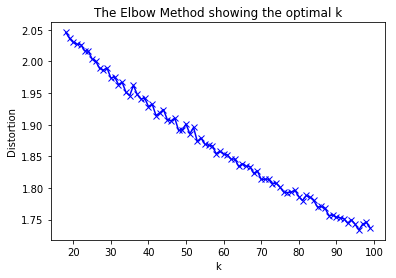

In [24]:
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
    
# k means determine k
distortions = []
K = range(18,100)
for k in K:
    kmeans_model = KMeans(init='k-means++', n_clusters=k, n_init=10)
    kmeans_model.fit(numpy_arrays)
    cluster_labels  = kmeans_model.labels_
    cluster_inertia   = kmeans_model.inertia_
    #cluster_to_words  = find_word_clusters(labels_array, cluster_labels)
    distortions.append(sum(np.min(cdist(numpy_arrays, kmeans_model.cluster_centers_, 'euclidean'), axis=1)) / numpy_arrays.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [26]:
diff = [abs(t - s) for s, t in zip(distortions, distortions[1:])]


In [33]:
maxCluster = diff.index(max(diff))+18
print("clustering in {} groups \n".format(maxCluster))
kmeans_model = KMeans(init='k-means++', n_clusters=maxCluster, n_init=10)
kmeans_model.fit(numpy_arrays)
cluster_labels  = kmeans_model.labels_
cluster_inertia   = kmeans_model.inertia_
cluster_to_words  = find_word_clusters(labels_array, cluster_labels)
for c in cluster_to_words:
    print(cluster_to_words[c])
    print("\n")
 

clustering in 52 groups 

['AcademicJournal', 'EducationalInstitution', 'campusSize', 'University', 'academicDiscipline', 'alumni', 'campus', 'campusSize', 'campusType', 'classes', 'doctoralStudent', 'education', 'endowment', 'facultySize', 'institution', 'notableStudent', 'numberOfDoctoralStudents', 'numberOfGraduateStudents', 'numberOfPostgraduateStudents', 'numberOfUndergraduateStudents', 'profession', 'teachingStaff', 'tuition', 'university']


['Activity', 'ArtificialSatellite', 'timeInSpace', 'fuelCapacity', 'BeautyQueen', 'BodyOfWater', 'BroadcastNetwork', 'BusinessPerson', 'Cheese', 'ChemicalCompound', 'CultivatedVariety', 'Currency', 'Device', 'Drug', 'powerOutput', 'EthnicGroup', 'Fashion', 'Food', 'Gnetophytes', 'GrandPrix', 'course', 'InformationAppliance', 'Language', 'LaunchPad', 'Magazine', 'mass', 'Medician', 'MilitaryConflict', 'MilitaryPerson', 'MilitaryStructure', 'MilitaryUnit', 'MixedMartialArtsEvent', 'MixedMartialArtsLeague', 'Mollusca', 'Nerve', 'Newspaper', 'No

In [35]:
for c in range(0, maxCluster):
    print(most_similar_words[c])
    print(cluster_to_words[c])
    print("\n")
 

legislature
['Congressman', 'Criminal', 'Election', 'GovernmentAgency', 'Governor', 'Judge', 'LawFirm', 'Legislature', 'MemberOfParliament', 'PoliticalParty', 'Politician', 'Prison', 'Senator', 'administrativeCollectivity', 'administrativeDistrict', 'agency', 'appointer', 'assembly', 'associationOfLocalGovernment', 'authority', 'board', 'budget', 'committee', 'committeeInLegislature', 'congressionalDistrict', 'electionMajority', 'federalState', 'governingBody', 'government', 'governmentCountry', 'governmentPlace', 'governmentPosition', 'governor', 'governorGeneral', 'ideology', 'incumbent', 'jurisdiction', 'leaderParty', 'legislativePeriodName', 'localAuthority', 'nominee', 'oversight', 'party', 'politicalPartyInLegislature', 'politicalPartyOfLeader', 'projectBudgetFunding', 'seniority', 'state', 'stateDelegate', 'unitaryAuthority']


ship
['Bay', 'maximumBoatBeam', 'maximumBoatLength', 'originalMaximumBoatBeam', 'originalMaximumBoatLength', 'Island', 'Lighthouse', 'RollerCoaster', 'Se

In [34]:
most_similar_words=[]
for i in range(0, maxCluster):
    #print(i)
    model_word_vector = np.array(kmeans_model.cluster_centers_[i], dtype='f')
    similar_word = w2v_model.most_similar( [ model_word_vector ], [], topn=1)[0][0]
    
    most_similar_words.append(similar_word)


In [45]:
word='car'
word_vector=phrase_vector(word)

In [46]:
label = kmeans_model.predict(word_vector)[0]
most_similar_words[label]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


'driver'